In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Imarticus\Capstone 2\complaints_processed.csv")

data.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [3]:
data['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [4]:
data.columns

Index(['Unnamed: 0', 'product', 'narrative'], dtype='object')

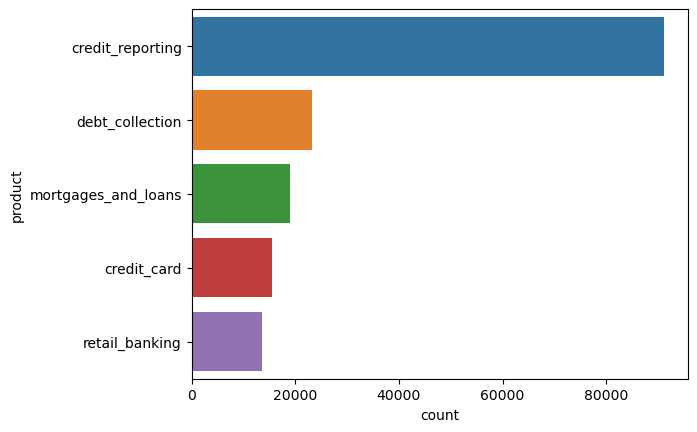

In [5]:
sns.countplot(data = data, y = "product", order = data['product'].value_counts().index)

plt.show()

In [6]:
for i in data.columns:
    print(i,' : ',data[i].isnull().sum())

Unnamed: 0  :  0
product  :  0
narrative  :  10


In [7]:
df = data.dropna(axis=0)

In [8]:
df.shape

(162411, 3)

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def text_clean(text, min_word_length=3):
    # Tokenize the text
    words = word_tokenize(text)

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Define a set of stopwords
    custom_stopwords = set(stopwords.words('english'))

    clean_words = []
    for word in words:
        # Convert to lowercase and lemmatize
        word = lemmatizer.lemmatize(word.lower())

        # Check if word is alphabetic and not in custom stopwords
        if word.isalpha() and len(word) >= min_word_length and word not in custom_stopwords:
            clean_words.append(word)

    return clean_words

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [10]:
text_clean(df['narrative'].values[0])

['purchase',
 'order',
 'day',
 'shipping',
 'amount',
 'receive',
 'product',
 'week',
 'sent',
 'followup',
 'email',
 'exact',
 'verbiage',
 'paid',
 'two',
 'day',
 'shipping',
 'received',
 'order',
 'company',
 'responded',
 'sorry',
 'inform',
 'due',
 'unusually',
 'high',
 'order',
 'volume',
 'order',
 'shipped',
 'several',
 'week',
 'stock',
 'since',
 'early',
 'due',
 'high',
 'demand',
 'although',
 'continuing',
 'take',
 'order',
 'guaranteeing',
 'receive',
 'order',
 'place',
 'due',
 'time',
 'mask',
 'order',
 'exact',
 'shipping',
 'date',
 'right',
 'however',
 'guarantee',
 'ship',
 'soon',
 'soon',
 'delivers',
 'product',
 'getting',
 'small',
 'shipment',
 'shipping',
 'first',
 'come',
 'first',
 'served',
 'basis',
 'appreciate',
 'patience',
 'fulfill',
 'order',
 'quickly',
 'recommend',
 'keeping',
 'order',
 'lose',
 'place',
 'line',
 'cancel',
 'distributor',
 'stock',
 'moment',
 'prefer',
 'cancel',
 'please',
 'note',
 'ask',
 'via',
 'email',
 'ca

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(analyzer = text_clean)

x_tfidf = tfidf.fit_transform(df['narrative'])

In [14]:
x_tfidf

<162411x45514 sparse matrix of type '<class 'numpy.float64'>'
	with 8411474 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, df['product'], test_size=0.2, random_state=42)

In [16]:
from sklearn.svm import LinearSVC
LVC=LinearSVC()
LVC.fit(X_train,y_train)

y_pred_LVC=LVC.predict(X_test)

print(classification_report(y_test,y_pred_LVC))

                     precision    recall  f1-score   support

        credit_card       0.79      0.77      0.78      3132
   credit_reporting       0.90      0.94      0.92     18283
    debt_collection       0.81      0.73      0.77      4615
mortgages_and_loans       0.85      0.81      0.83      3770
     retail_banking       0.86      0.87      0.86      2683

           accuracy                           0.87     32483
          macro avg       0.84      0.82      0.83     32483
       weighted avg       0.87      0.87      0.87     32483



In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

y_pred_tree=tree.predict(X_test)

print(classification_report(y_test,y_pred_tree))

                     precision    recall  f1-score   support

        credit_card       0.67      0.65      0.66      3132
   credit_reporting       0.89      0.92      0.91     18283
    debt_collection       0.73      0.67      0.70      4615
mortgages_and_loans       0.76      0.72      0.74      3770
     retail_banking       0.75      0.74      0.74      2683

           accuracy                           0.82     32483
          macro avg       0.76      0.74      0.75     32483
       weighted avg       0.82      0.82      0.82     32483



In [17]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(max_iter = 500)
lreg.fit(X_train,y_train)

y_pred_lreg=lreg.predict(X_test)

print(classification_report(y_test,y_pred_lreg))

                     precision    recall  f1-score   support

        credit_card       0.79      0.77      0.78      3132
   credit_reporting       0.90      0.94      0.92     18283
    debt_collection       0.82      0.72      0.77      4615
mortgages_and_loans       0.86      0.82      0.84      3770
     retail_banking       0.87      0.89      0.88      2683

           accuracy                           0.87     32483
          macro avg       0.85      0.83      0.84     32483
       weighted avg       0.87      0.87      0.87     32483



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [19]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [500, 1000, 10000],
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

In [20]:
grid_search.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 1000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [21]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [22]:
print(best_params)
print(best_estimator)

{'C': 1, 'max_iter': 500, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=500)


In [23]:
y_pred_lreg = best_estimator.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_lreg))

                     precision    recall  f1-score   support

        credit_card       0.79      0.77      0.78      3132
   credit_reporting       0.90      0.94      0.92     18283
    debt_collection       0.82      0.72      0.77      4615
mortgages_and_loans       0.86      0.82      0.84      3770
     retail_banking       0.87      0.89      0.88      2683

           accuracy                           0.87     32483
          macro avg       0.85      0.83      0.84     32483
       weighted avg       0.87      0.87      0.87     32483

